In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
def processData(data, lb):
    
    X,Y = [],[]
    
    for i in range(len(data) - lb -1):
        
        #what this is doing is getting the values and then make a new column cutting off the top value 10 times
        X.append(data[i:(i+lb), 0])
        
        #not sure what y does
        Y.append(data[(i+lb), 0])
        
    return np.array(X), np.array(Y)

In [3]:
#pulling data
data = yf.download("AMZN", start = "2019-06-01", interval = "1h", end = "2021-01-07", progress = False)[['Close']]
data.head()

,Close
Date,
2019-06-03,1713.890015
2019-06-03,1721.839966
2019-06-03,1692.410034
2019-06-03,1688.592773
2019-06-03,1694.300049


Text(0.5, 1.0, 'Amazon Stock Price')

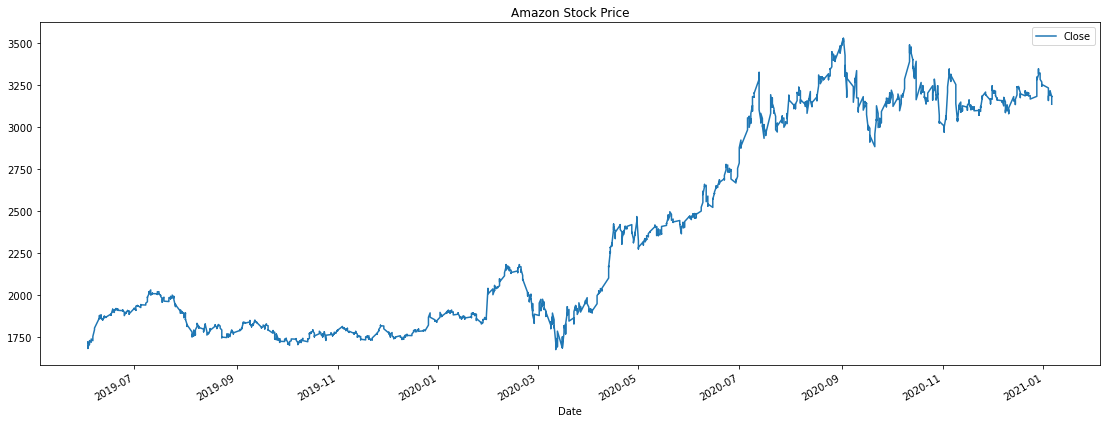

In [4]:
data.plot(figsize = (19,7))
plt.title("Amazon Stock Price")

In [5]:
#this is necesary because we want it to be a series
cl = data.Close.astype("float32")

#we want to cut the training data into 90% of what it was
train = cl[0:int(len(cl) * 0.90)]

#then we want to scale the data for scikit-learn
scl = MinMaxScaler()
scl.fit(train.values.reshape(-1,1))

#cl is what we are comparing against
new_cl = scl.transform(cl.values.reshape(-1,1))

#now we make a lookback window of 10
lb = 10
X, y = processData(new_cl, lb)

In [6]:
#now we want to make the training data
X_train, X_test = X[:int(X.shape[0] * 0.90)], X[int(X.shape[0] * 0.90):]
y_train, y_test = y[:int(y.shape[0] * 0.90)], y[int(X.shape[0] * 0.90):]

In [7]:
model = Sequential()
model.add(LSTM(256, input_shape = (lb,1)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

In [8]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [9]:
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

[==============================] - 1s 16ms/step - loss: 3.0428e-04 - val_loss: 2.2357e-04
Epoch 120/300
79/79 [==============================] - 1s 15ms/step - loss: 1.0831e-04 - val_loss: 3.4671e-04
Epoch 121/300
79/79 [==============================] - 1s 15ms/step - loss: 2.0142e-04 - val_loss: 1.3887e-04
Epoch 122/300
79/79 [==============================] - 1s 15ms/step - loss: 1.0686e-04 - val_loss: 1.1635e-04
Epoch 123/300
79/79 [==============================] - 1s 15ms/step - loss: 7.6033e-05 - val_loss: 1.1355e-04
Epoch 124/300
79/79 [==============================] - 1s 15ms/step - loss: 7.5072e-05 - val_loss: 1.1155e-04
Epoch 125/300
79/79 [==============================] - 1s 16ms/step - loss: 7.3937e-05 - val_loss: 1.1242e-04
Epoch 126/300
79/79 [==============================] - 1s 16ms/step - loss: 7.4545e-05 - val_loss: 1.1347e-04
Epoch 127/300
79/79 [==============================] - 1s 17ms/step - loss: 7.4846e-05 - val_loss: 1.1460e-04
Epoch 128/300
79/79 [=========

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Train Dataset')

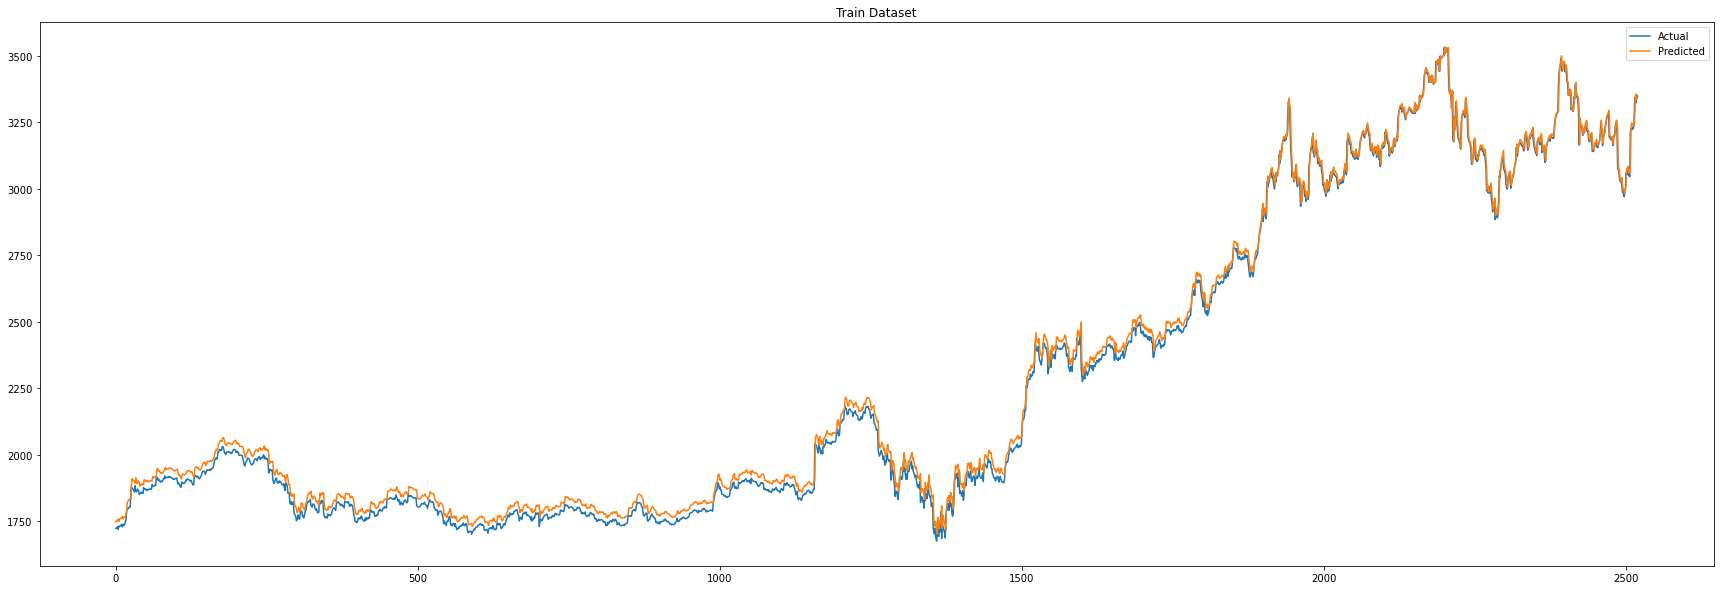

In [18]:
plt.figure(figsize = (30,10))

Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label = "Actual")
plt.plot(scl.inverse_transform(Xt), label = "Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Tetsed Dataset')

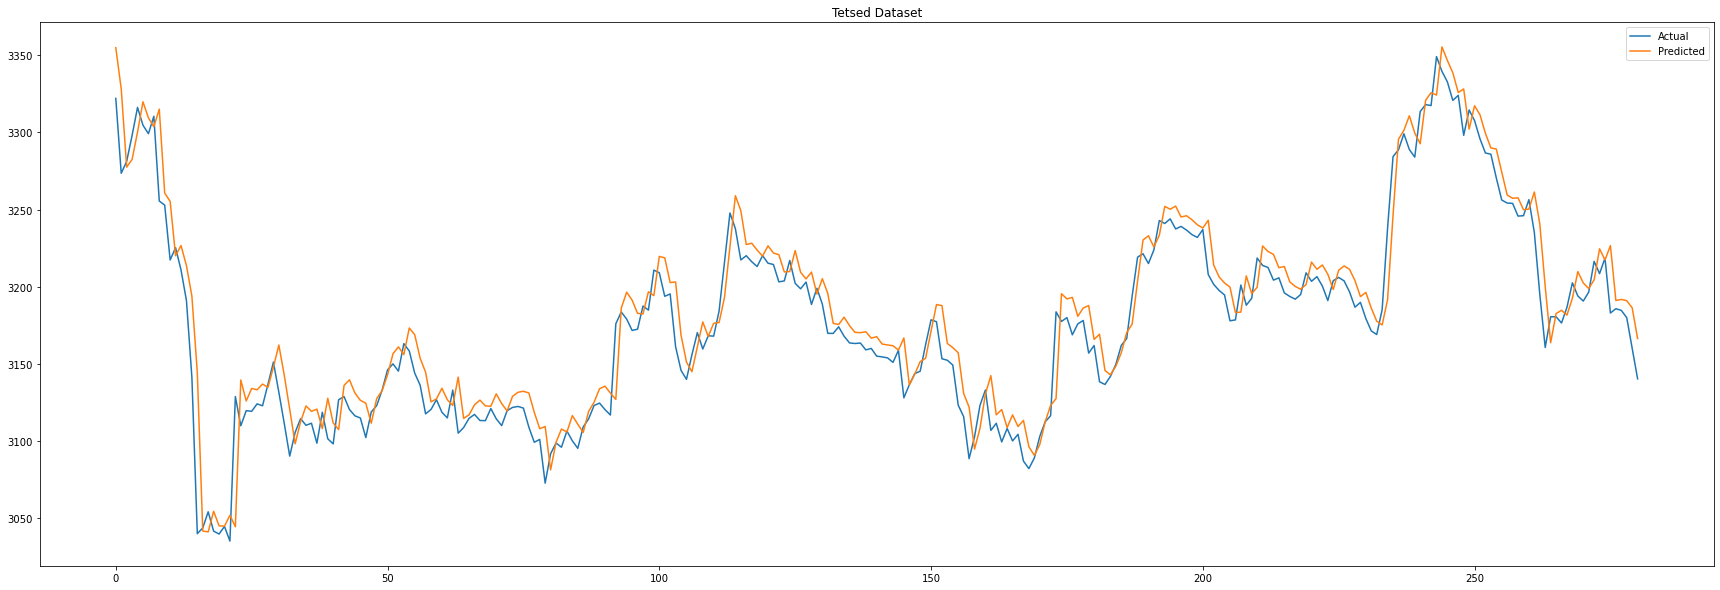

In [20]:
plt.figure(figsize = (30,10))

Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label = "Actual")
plt.plot(scl.inverse_transform(Xt), label = "Predicted")
plt.legend()
plt.title("Tetsed Dataset")

In [22]:
def processData(data, lb):
    
    for i in range(len(data) - lb - 1):
        X.append(data[i: (i+lb), 0])
    
    return np.array(X)

In [ ]:
cl2 = cl.copy()
pred = []

for i in range(X_test.shape[0]):

    cl2[int(X.shape[0] * 0.90) + i + lb] = model.predict(X_test)[i]
    pred.extend(model.predict(X_test)[i])
    X = processData(cl2, lb)
    X_train, X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))